
# **Analysis of CTA Crimes**

This notebook focuses on observing the overall crime rates, comparing them to years before the COVID-19 Pandemic. This notebook will also observe the crimes by month, the top locations of where these incidents happened, and what types of crimes they are specifically.  

**Group Memebers: Amina Marin**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data sets to see total number of crimes / crime types in the years 2015 - 2024
df_crime2015 = pd.read_csv('data/CTA_Data/CTA_Crimes_2015.csv')
df_crime2016 = pd.read_csv('data/CTA_Data/CTA_Crimes_2016.csv')
df_crime2017 = pd.read_csv('data/CTA_Data/CTA_Crimes_2017.csv')
df_crime2018 = pd.read_csv('data/CTA_Data/CTA_Crimes_2018.csv')
df_crime2019 = pd.read_csv('data/CTA_Data/CTA_Crimes_2019.csv')
df_crime2020 = pd.read_csv('data/CTA_Data/CTA_Crimes_2020.csv')
df_crime2021 = pd.read_csv('data/CTA_Data/CTA_Crimes_2021.csv')
df_crime2022 = pd.read_csv('data/CTA_Data/CTA_Crimes_2022.csv')
df_crime2023 = pd.read_csv('data/CTA_Data/CTA_Crimes_2023.csv')
df_crime2024 = pd.read_csv('data/CTA_Data/CTA_Crimes_2024.csv')

## **CTA Crimes By Year**

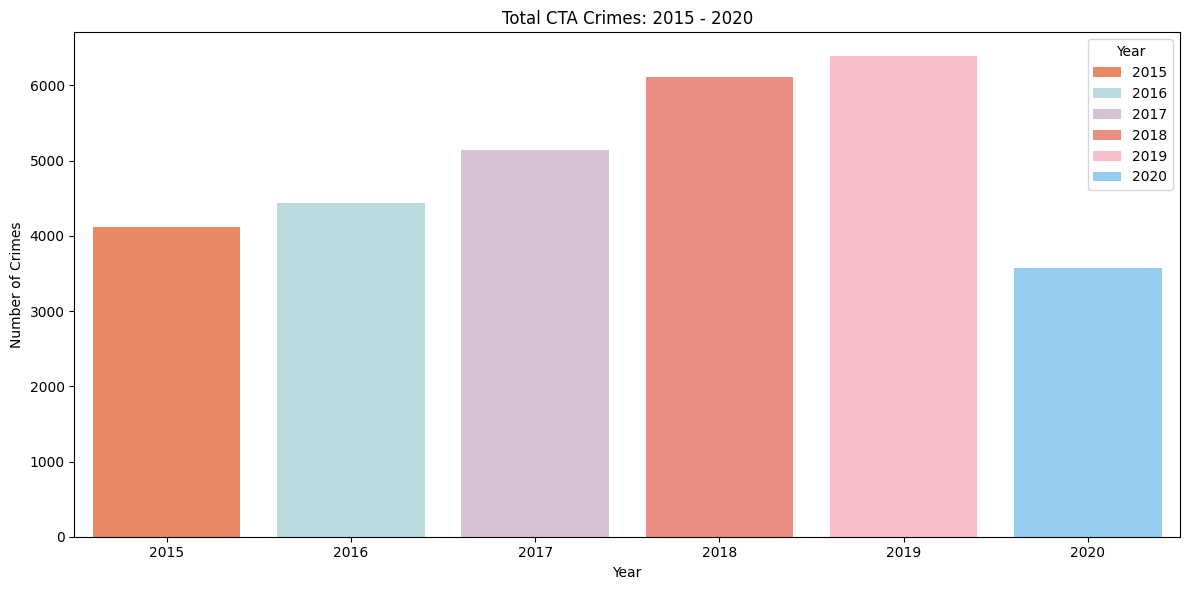

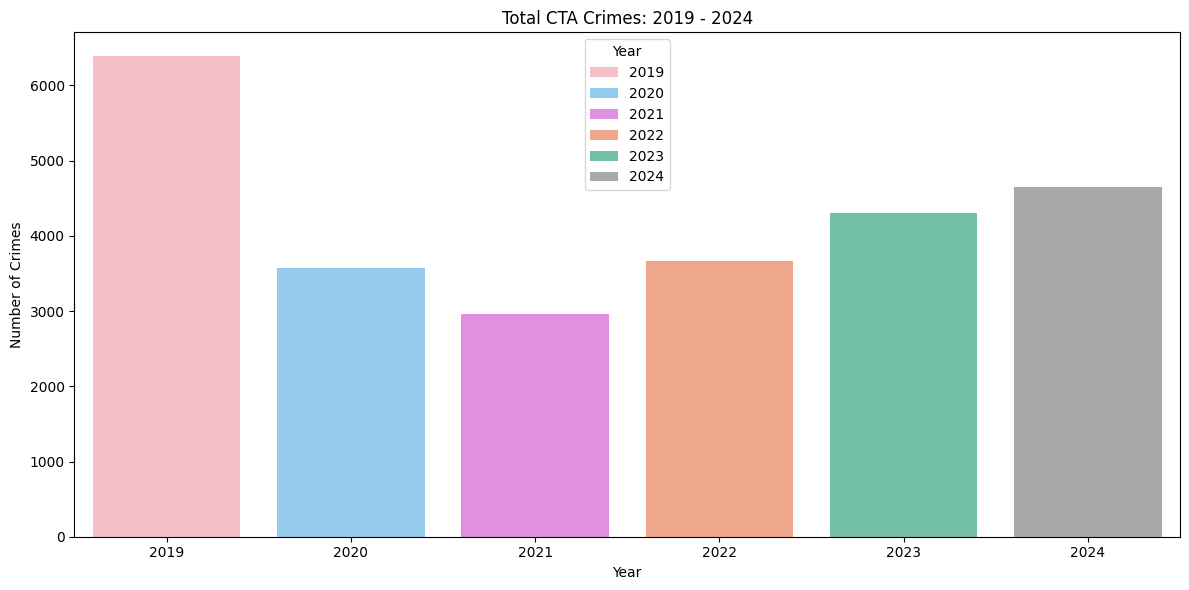

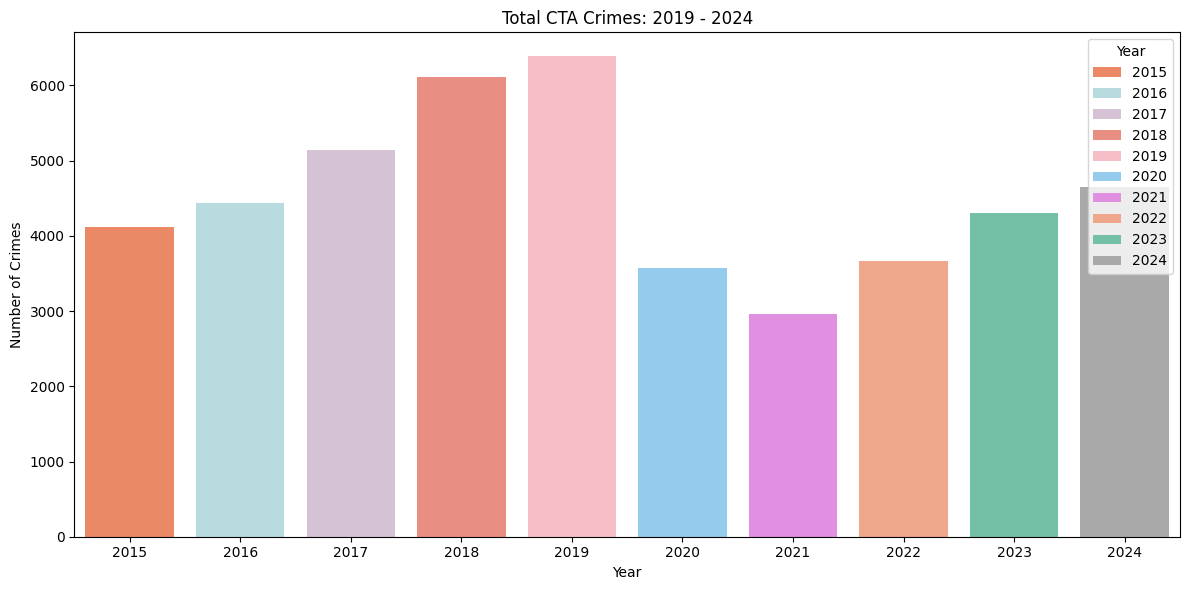

In [19]:
# create a barplot displaying the total crimes for each year 2015-2020
total = pd.DataFrame({
    'Year': [2015,2016,2017,2018,2019,2020],
    'Total Crimes': [len(df_crime2015),len(df_crime2016),len(df_crime2017),len(df_crime2018),len(df_crime2019),len(df_crime2020)]
})
plt.figure(figsize = (12,6))
sns.barplot(data=total, x='Year', y='Total Crimes', hue='Year', hue_order=[2015,2016,2017,2018,2019,2020], 
            palette=['coral','powderblue','thistle','salmon', 'lightpink','lightskyblue'])
plt.title('Total CTA Crimes: 2015 - 2020')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# create a barplot displaying the total crimes for each year 2019-2024
total = pd.DataFrame({
    'Year': [2019,2020,2021,2022,2023,2024],
    'Total Crimes': [len(df_crime2019),len(df_crime2020),len(df_crime2021),len(df_crime2022),len(df_crime2023),len(df_crime2024)]
})
plt.figure(figsize = (12,6))
sns.barplot(data=total, x='Year', y='Total Crimes', hue='Year', hue_order=[2019,2020,2021,2022,2023,2024], 
            palette=['lightpink','lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.title('Total CTA Crimes: 2019 - 2024')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

# create a barplot displaying the total crimes for each year 2015-2024
total = pd.DataFrame({
    'Year': [2015,2016,2017,2018,2019,2020,2021,2022,2023,2024],
    'Total Crimes': [len(df_crime2015),len(df_crime2016),len(df_crime2017),len(df_crime2018),len(df_crime2019),
                     len(df_crime2020),len(df_crime2021),len(df_crime2022),len(df_crime2023),len(df_crime2024)]
})
plt.figure(figsize = (12,6))
sns.barplot(data=total, x='Year', y='Total Crimes', hue='Year', hue_order=[2015,2016,2017,2018,2019,2020,2021,2022,2023,2024], 
            palette=['coral','powderblue','thistle','salmon','lightpink','lightskyblue',
                     'violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.title('Total CTA Crimes: 2019 - 2024')
plt.ylabel('Number of Crimes')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

## **CTA Crimes by Month**

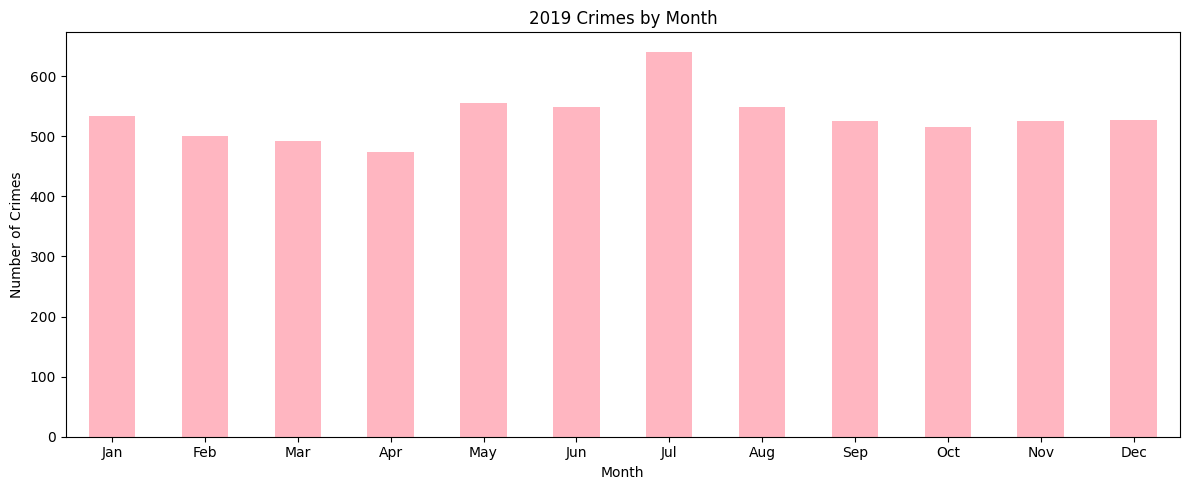

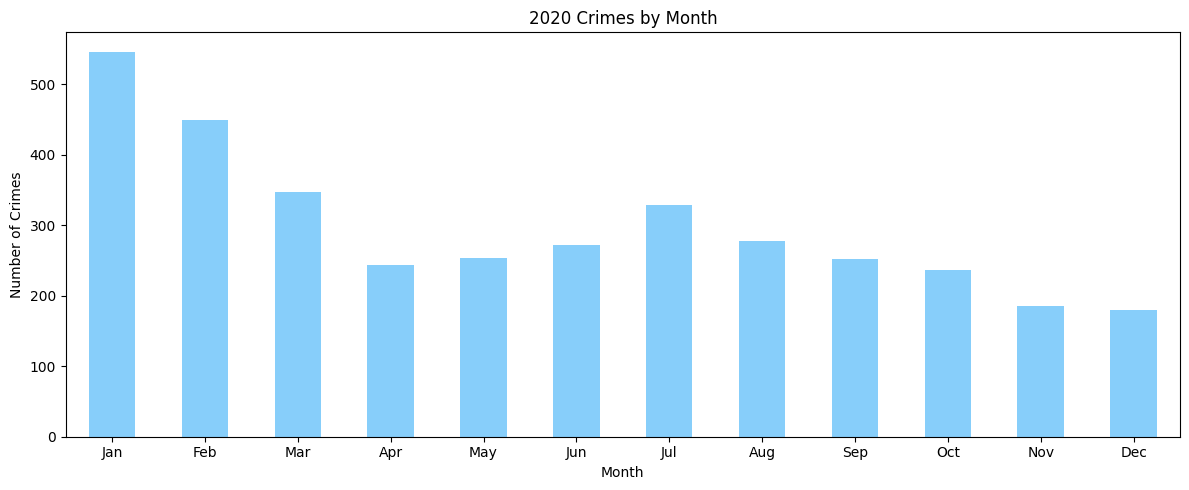

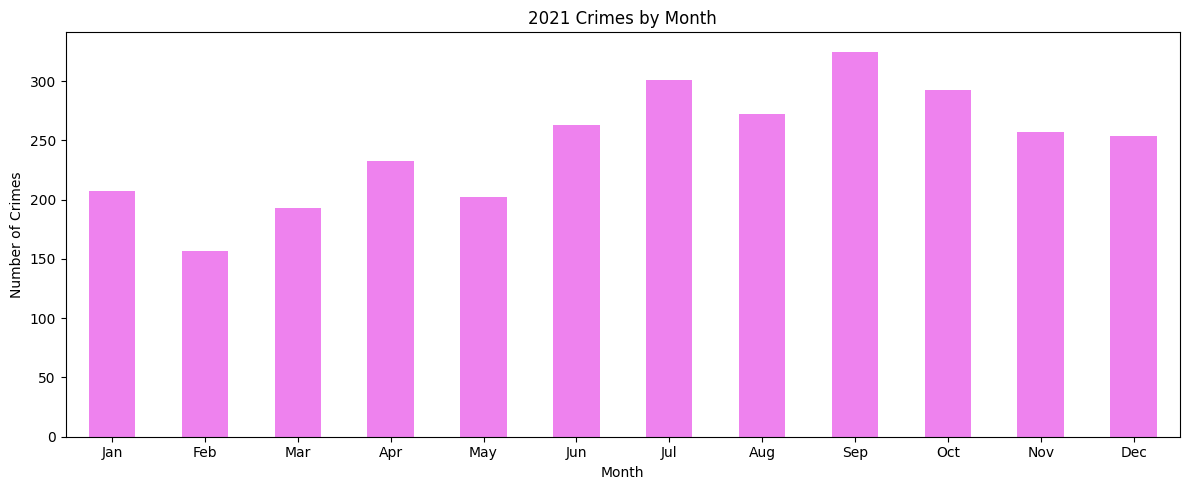

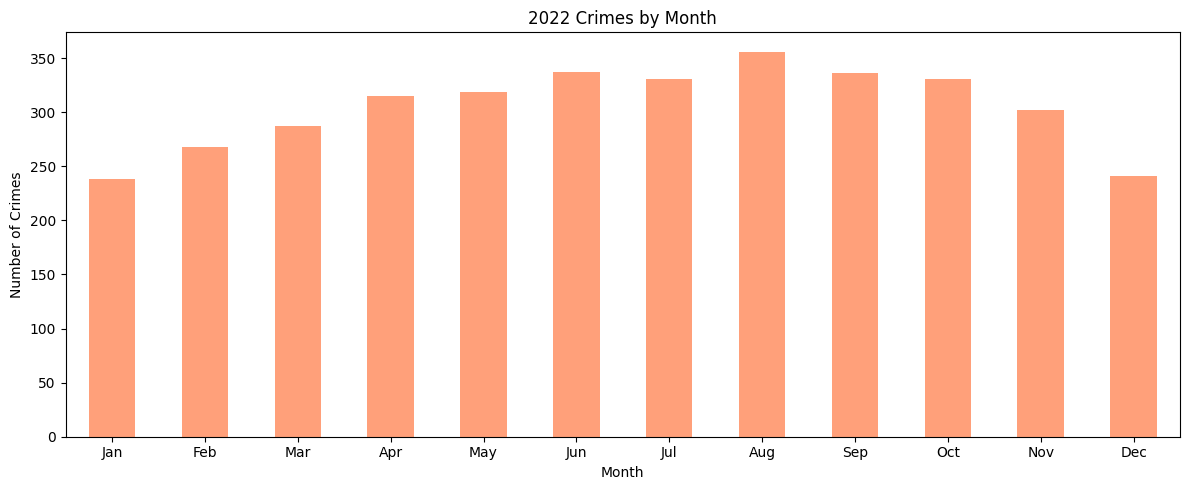

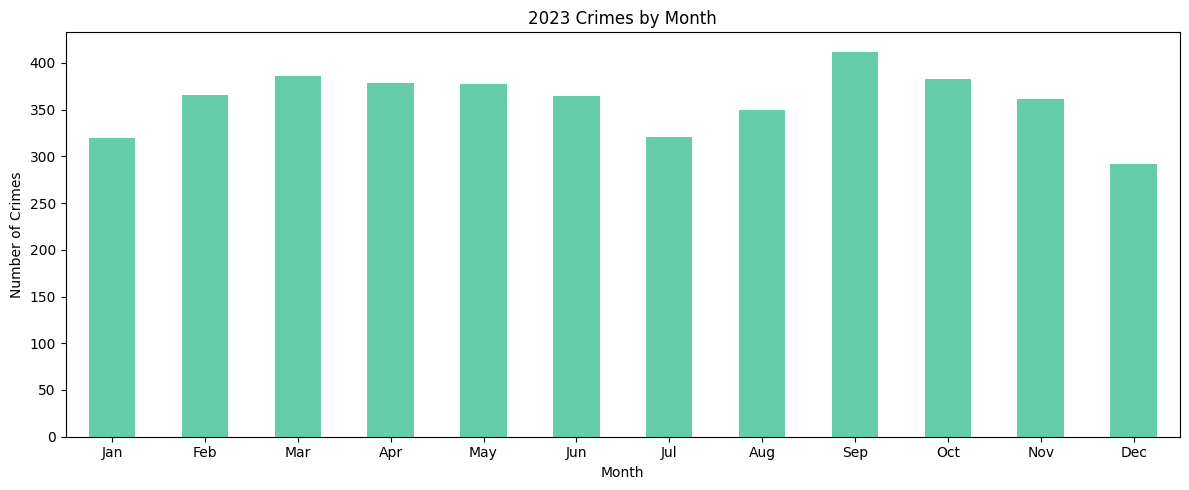

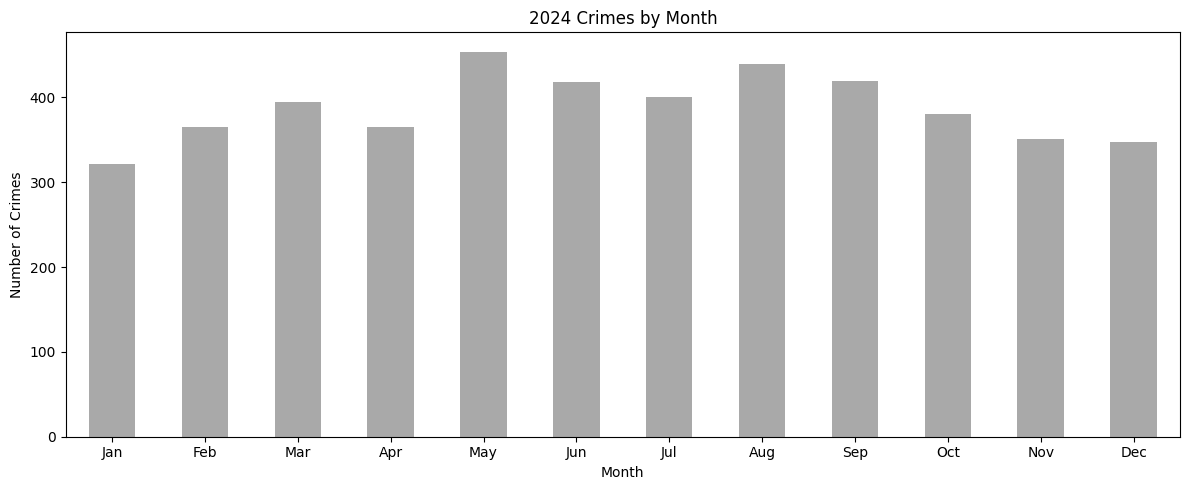

In [17]:
# convert date columns to datetime format
df_crime2019['Date'] = pd.to_datetime(df_crime2019['Date'])
df_crime2020['Date'] = pd.to_datetime(df_crime2020['Date'])
df_crime2021['Date'] = pd.to_datetime(df_crime2021['Date'])
df_crime2022['Date'] = pd.to_datetime(df_crime2022['Date'])
df_crime2023['Date'] = pd.to_datetime(df_crime2023['Date'])
df_crime2024['Date'] = pd.to_datetime(df_crime2024['Date'])

#2019 months
df_crime2019['Month'] = df_crime2019['Date'].dt.month
months_2019 = df_crime2019['Month'].value_counts().sort_index()

months_2019.plot(kind='bar', figsize=(12,5), color='lightpink')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2019 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2020 months
df_crime2020['Month'] = df_crime2020['Date'].dt.month
months_2020 = df_crime2020['Month'].value_counts().sort_index()

months_2020.plot(kind='bar', figsize=(12,5), color='lightskyblue')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2020 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2021 months
df_crime2021['Month'] = df_crime2021['Date'].dt.month
months_2021 = df_crime2021['Month'].value_counts().sort_index()

months_2021.plot(kind='bar', figsize=(12,5), color='violet')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2021 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2022 months
df_crime2022['Month'] = df_crime2022['Date'].dt.month
months_2022 = df_crime2022['Month'].value_counts().sort_index()

months_2022.plot(kind='bar', figsize=(12,5), color='lightsalmon')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2022 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2023 months
df_crime2023['Month'] = df_crime2023['Date'].dt.month
months_2023 = df_crime2023['Month'].value_counts().sort_index()

months_2023.plot(kind='bar', figsize=(12,5), color='mediumaquamarine')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2023 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

# 2024 months
df_crime2024['Month'] = df_crime2024['Date'].dt.month
months_2024 = df_crime2024['Month'].value_counts().sort_index()

months_2024.plot(kind='bar', figsize=(12,5), color='darkgray')
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2024 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## **CTA Crimes by Month Combined**

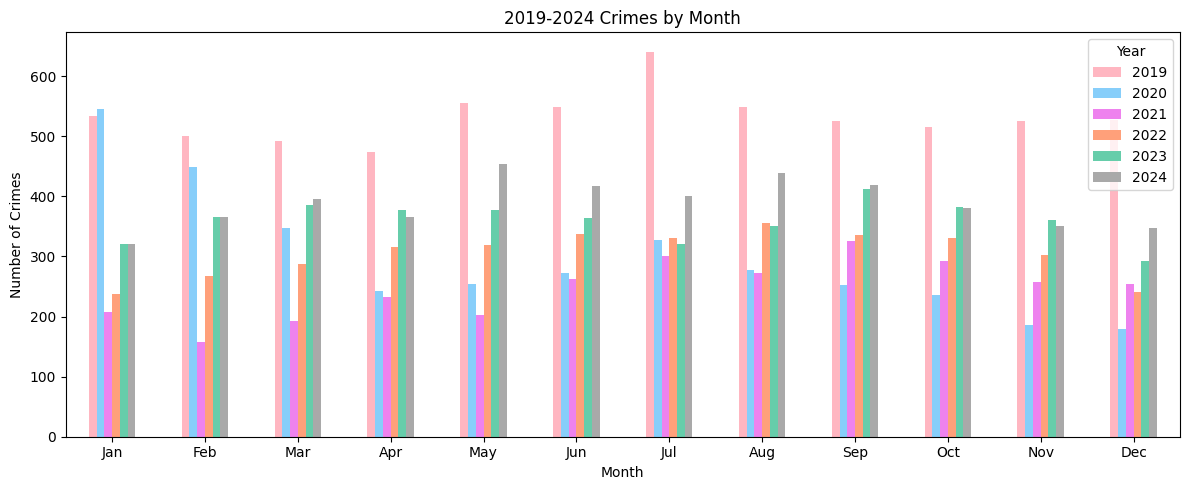

In [18]:
# assign years
df_crime2019['Year'] = 2019
df_crime2020['Year'] = 2020
df_crime2021['Year'] = 2021
df_crime2022['Year'] = 2022
df_crime2023['Year'] = 2023
df_crime2024['Year'] = 2024

# combine the dataframes by month
combined = pd.concat([df_crime2019, df_crime2020, df_crime2021, df_crime2022, df_crime2023, df_crime2024], ignore_index=True)
combined['Date'] = pd.to_datetime(combined['Date'])
combined['Month'] = combined['Date'].dt.month

# group by month and year
grouped = combined.groupby(['Month', 'Year']).size().unstack()

# create barplot
grouped.plot(kind='bar', figsize=(12,5), color=['lightpink','lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.xticks(ticks=range(0,12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0)
plt.title('2019-2024 Crimes by Month')
plt.ylabel('Number of Crimes')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

## **CTA Crime Types**

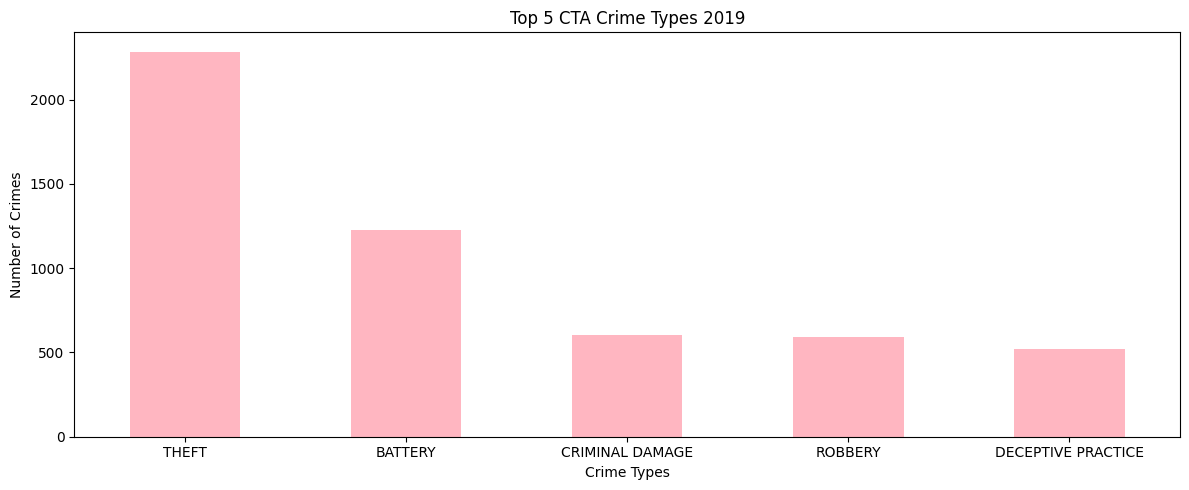

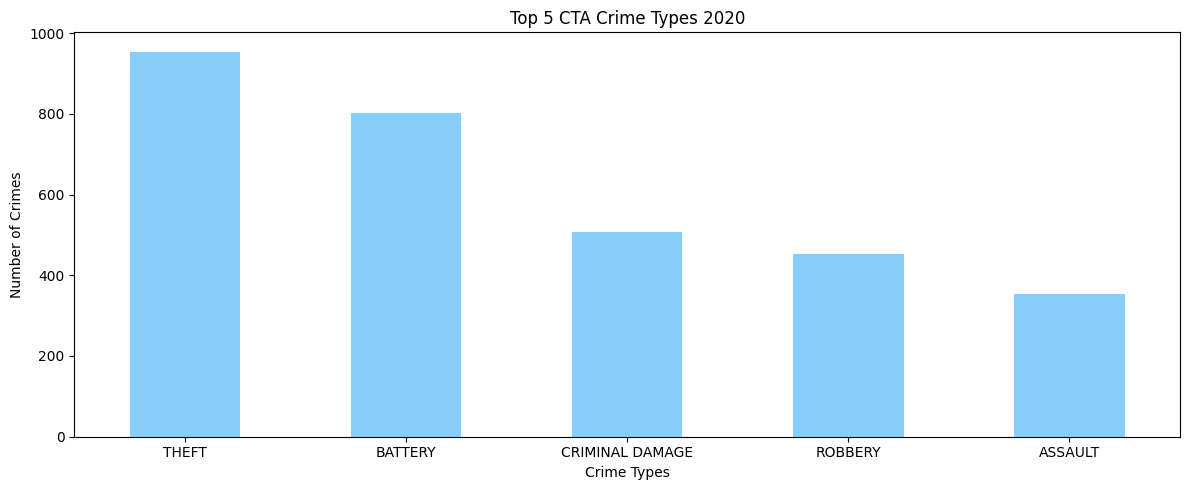

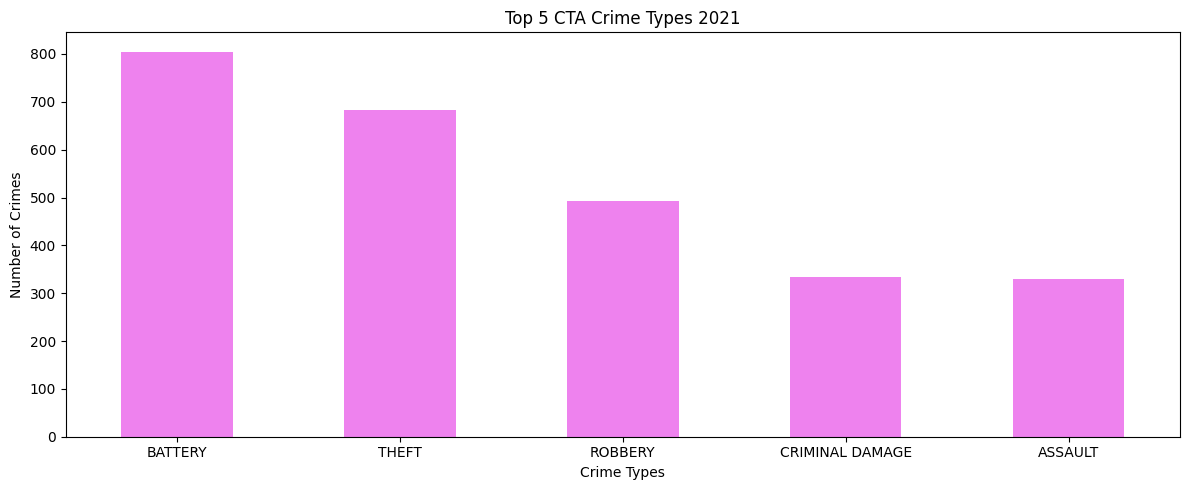

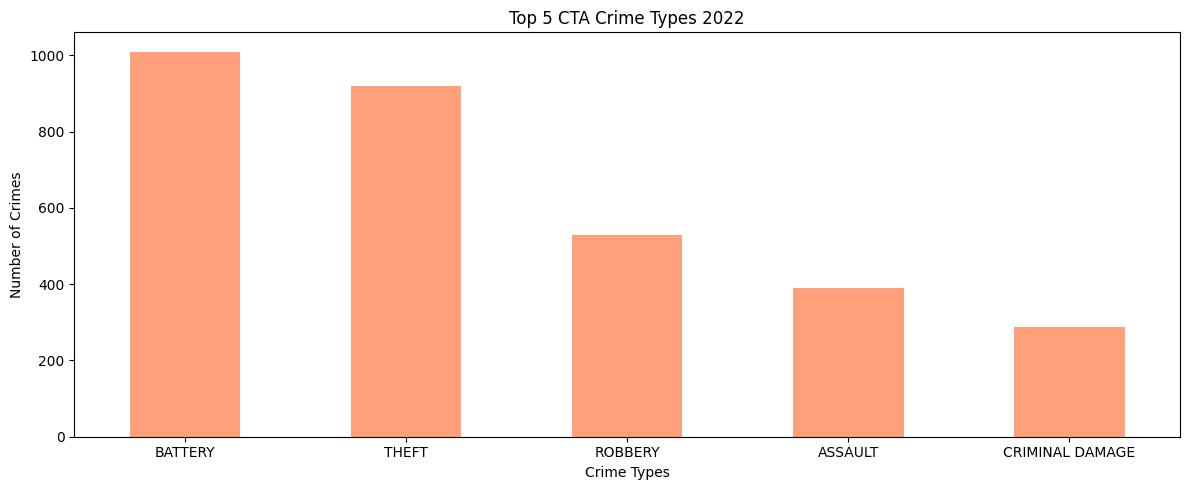

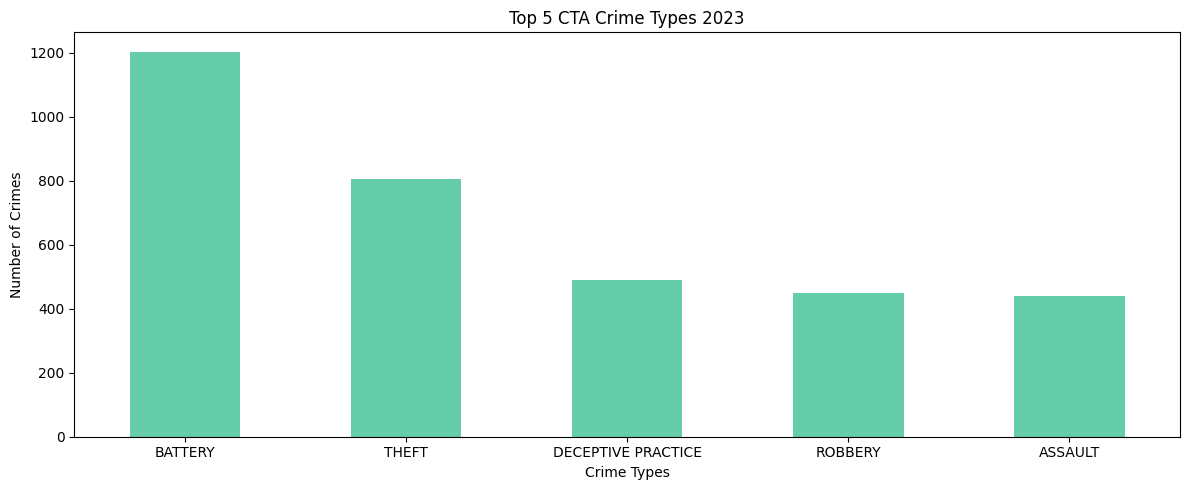

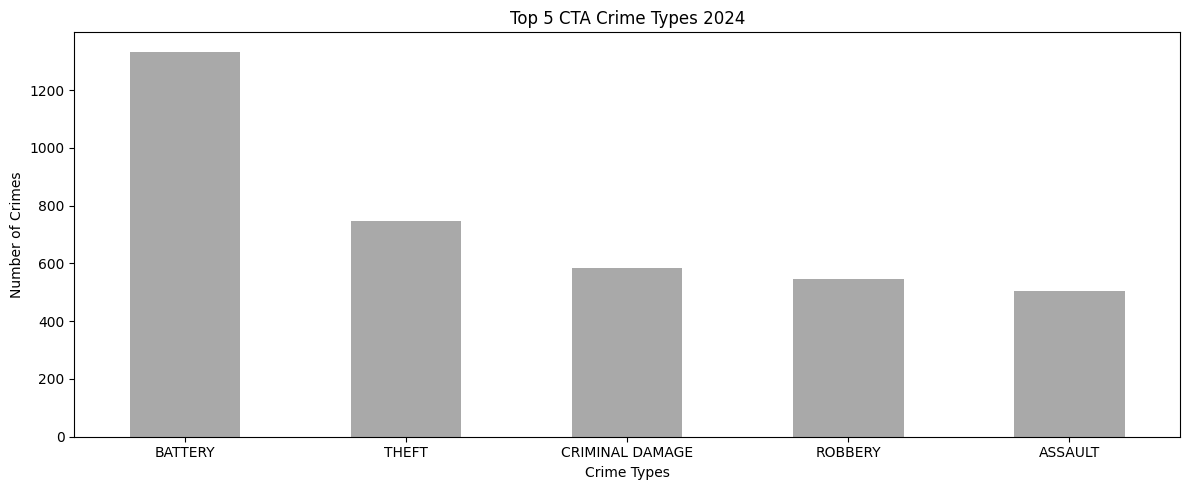

In [19]:
# create a unique dataframes for types of crimes
#2019
types_2019 = df_crime2019['Primary Type'].value_counts()
types_2019 = types_2019[types_2019 > 0]
top5_2019 = df_crime2019['Primary Type'].value_counts().head(5)
# barplot
top5_2019.plot(kind='bar', figsize=(12,5), color='lightpink')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2019')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2020
types_2020 = df_crime2020['Primary Type'].value_counts()
types_2020 = types_2020[types_2020 > 0]
top5_2020 = df_crime2020['Primary Type'].value_counts().head(5)
# barplot
top5_2020.plot(kind='bar', figsize=(12,5), color='lightskyblue')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2020')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2021
types_2021 = df_crime2021['Primary Type'].value_counts()
types_2021 = types_2021[types_2021 > 0]
top5_2021 = df_crime2021['Primary Type'].value_counts().head(5)
# barplot
top5_2021.plot(kind='bar', figsize=(12,5), color='violet')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2021')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2022
types_2022 = df_crime2022['Primary Type'].value_counts()
types_2022 = types_2022[types_2022 > 0]
top5_2022 = df_crime2022['Primary Type'].value_counts().head(5)
# barplot
top5_2022.plot(kind='bar', figsize=(12,5), color='lightsalmon')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2022')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2023
types_2023 = df_crime2023['Primary Type'].value_counts()
types_2023 = types_2023[types_2023 > 0]
top5_2023 = df_crime2023['Primary Type'].value_counts().head(5)
# barplot
top5_2023.plot(kind='bar', figsize=(12,5), color='mediumaquamarine')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2023')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2024
types_2024 = df_crime2024['Primary Type'].value_counts()
types_2024 = types_2024[types_2024 > 0]
top5_2024 = df_crime2024['Primary Type'].value_counts().head(5)
# barplot
top5_2024.plot(kind='bar', figsize=(12,5), color='darkgray')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Types 2024')
plt.xlabel('Crime Types')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

## **Top 3 CTA Crime Types**

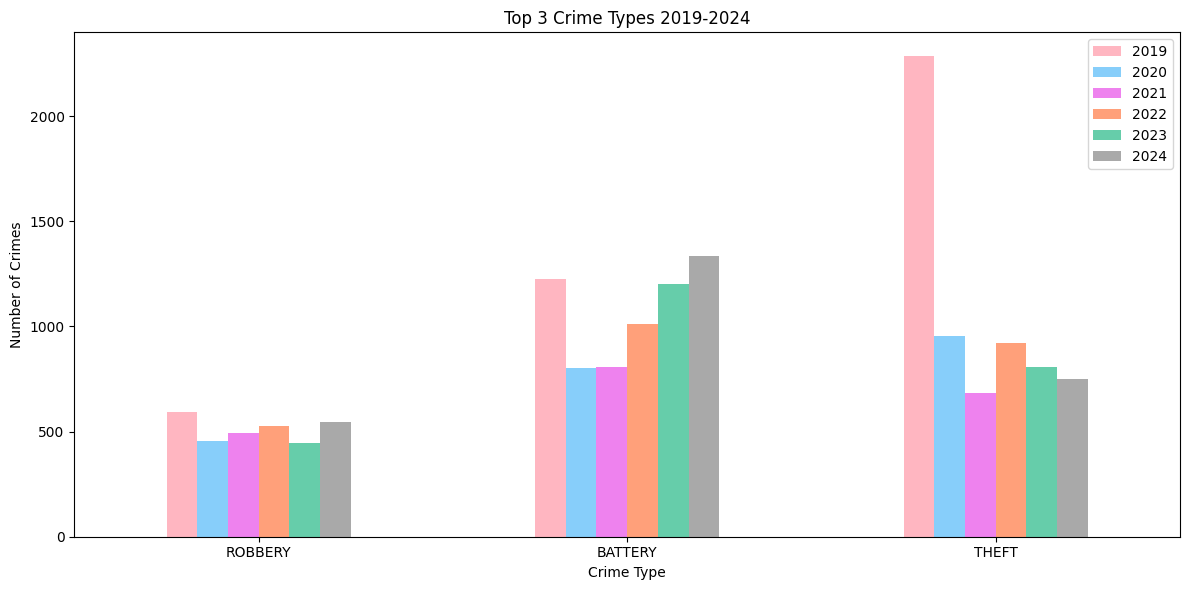

In [34]:
# get the crime types for each year
top5_2019_types = set(top5_2019.index)
top5_2020_types = set(top5_2020.index)
top5_2021_types = set(top5_2021.index)
top5_2022_types = set(top5_2022.index)
top5_2023_types = set(top5_2023.index)
top5_2024_types = set(top5_2024.index)

# find common crime types
common = (top5_2019_types & top5_2020_types & top5_2021_types & top5_2022_types & top5_2023_types & top5_2024_types)

# create a dataframe
common_data = {
    '2019': top5_2019[list(common)],
    '2020': top5_2020[list(common)],
    '2021': top5_2021[list(common)],
    '2022': top5_2022[list(common)],
    '2023': top5_2023[list(common)],
    '2024': top5_2024[list(common)]
}
common_df = pd.DataFrame(common_data)

# create barplot
common_df.plot(kind='bar', figsize=(12,6), color=['lightpink','lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.xticks(rotation=0)
plt.title('Top 3 Crime Types 2019-2024')
plt.ylabel('Number of Crimes')
plt.xlabel('Crime Type')
plt.tight_layout()
plt.show()

## **CTA Crime Locations**

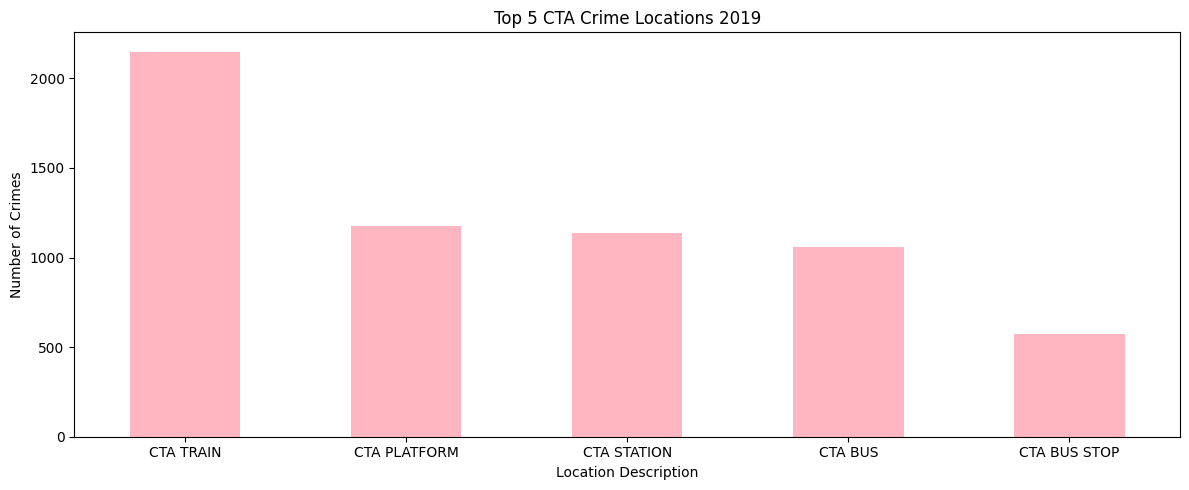

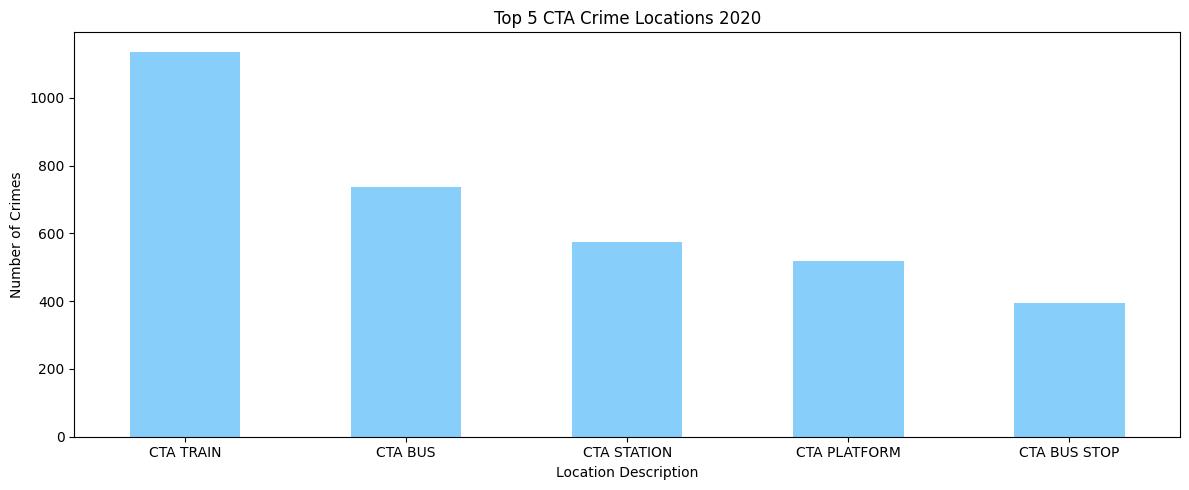

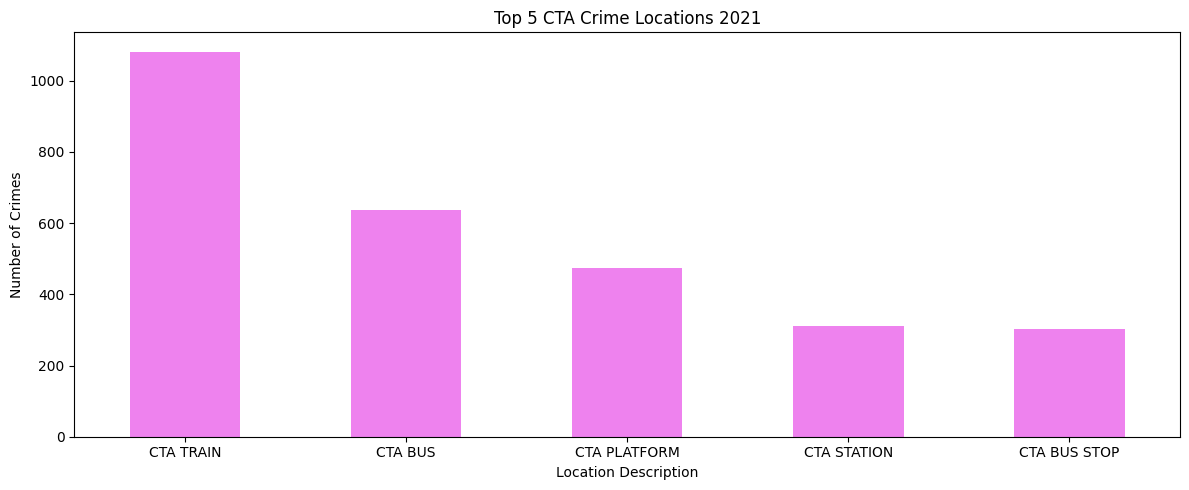

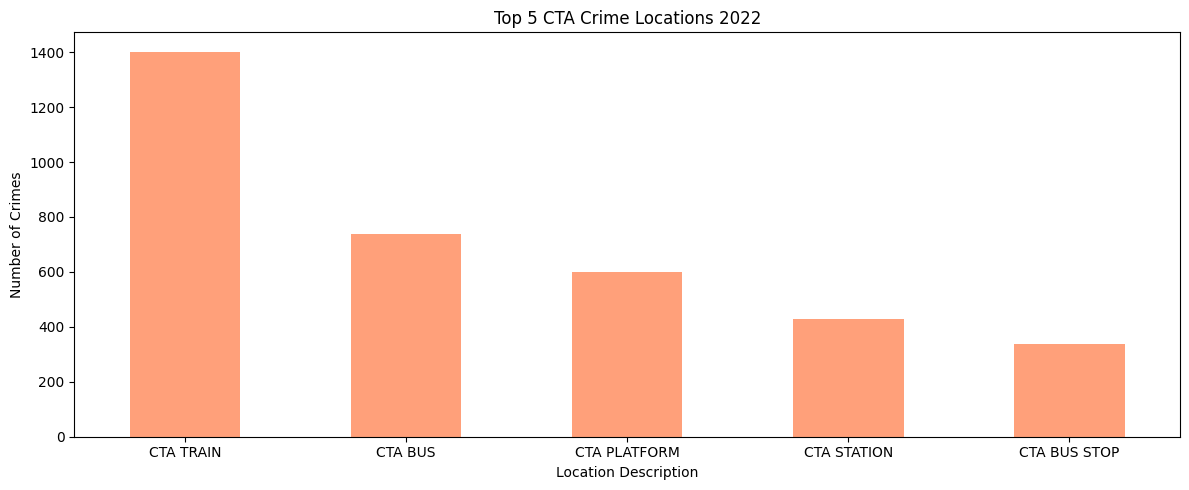

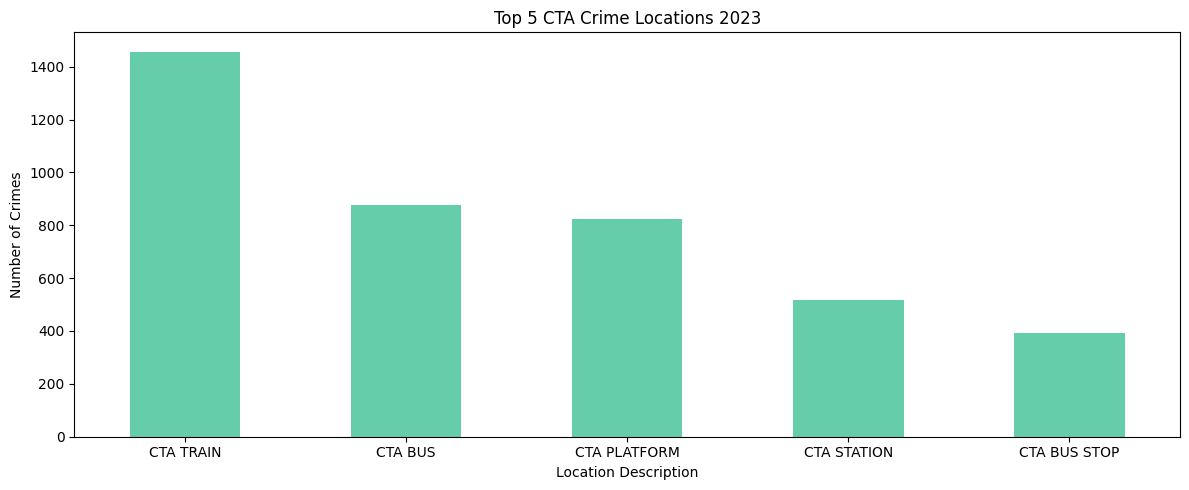

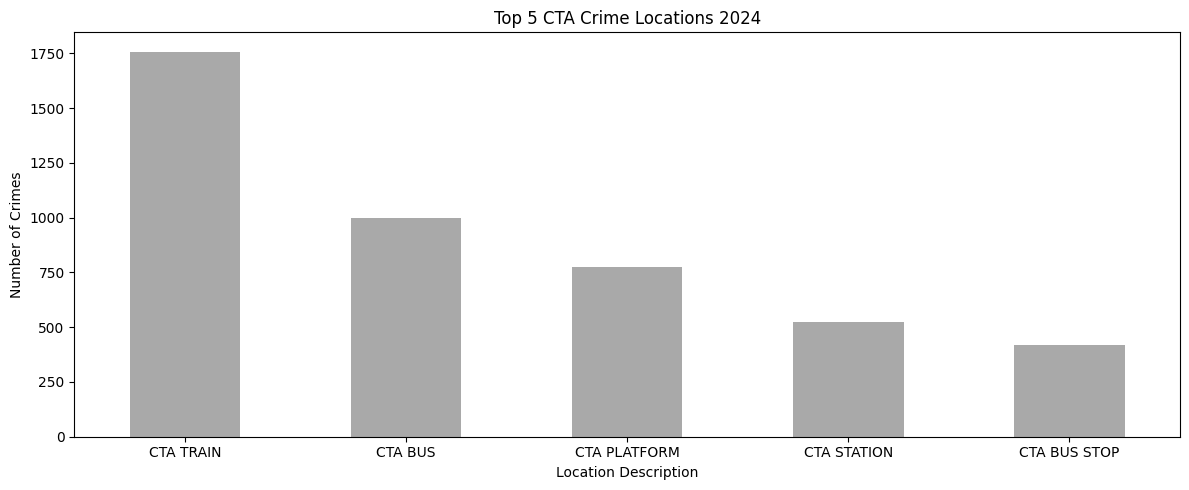

In [4]:
# create unique dataframes to visualize the top 5 CTA crime locations
top5_2019_loc = df_crime2019['Location Description'].value_counts().head(5)
top5_2020_loc = df_crime2020['Location Description'].value_counts().head(5)
top5_2021_loc = df_crime2021['Location Description'].value_counts().head(5)
top5_2022_loc = df_crime2022['Location Description'].value_counts().head(5)
top5_2023_loc = df_crime2023['Location Description'].value_counts().head(5)
top5_2024_loc = df_crime2024['Location Description'].value_counts().head(5)

# 2019
top5_2019_loc.plot(kind='bar', figsize=(12,5), color='lightpink')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2019')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2020
top5_2020_loc.plot(kind='bar', figsize=(12,5), color='lightskyblue')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2020')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2021
top5_2021_loc.plot(kind='bar', figsize=(12,5), color='violet')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2021')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2022
top5_2022_loc.plot(kind='bar', figsize=(12,5), color='lightsalmon')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2022')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2023
top5_2023_loc.plot(kind='bar', figsize=(12,5), color='mediumaquamarine')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2023')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

# 2024
top5_2024_loc.plot(kind='bar', figsize=(12,5), color='darkgray')
plt.xticks(rotation=0)
plt.title('Top 5 CTA Crime Locations 2024')
plt.xlabel('Location Description')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()

## **Top 5 CTA Crime Locations**

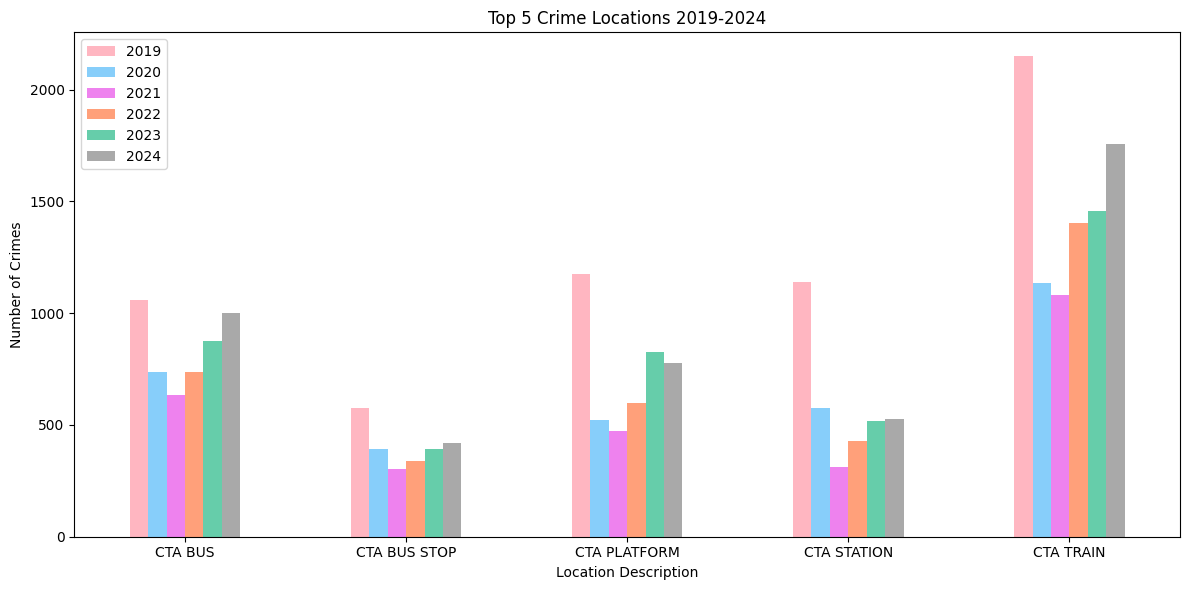

In [8]:
# create a dataframe
top5_loc = {
    '2019': top5_2019_loc,
    '2020': top5_2020_loc,
    '2021': top5_2021_loc,
    '2022': top5_2022_loc,
    '2023': top5_2023_loc,
    '2024': top5_2024_loc
}
combined_top5 = pd.DataFrame(top5_loc)

# plot
combined_top5.plot(kind='bar', figsize=(12,6), color=['lightpink','lightskyblue','violet','lightsalmon', 'mediumaquamarine','darkgray'])
plt.xticks(rotation=0)
plt.title('Top 5 Crime Locations 2019-2024')
plt.ylabel('Number of Crimes')
plt.xlabel('Location Description')
plt.tight_layout()
plt.show() 

## **Statistical Analysis Technique:**
### **Chi-Square Test of Independence**


In [14]:
from scipy.stats import chi2_contingency

# create a dataframe for all the years
df_all = pd.concat([df_crime2019, df_crime2020, df_crime2021, 
                    df_crime2022, df_crime2023, df_crime2024], 
                   ignore_index=True)


contingency_table = pd.crosstab(df_all['Primary Type'], df_all['Location Description'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}") # 30033.22148366497
print(f"p-value: {p}") # 0.0
print(f"Degrees of freedom: {dof}") # 319

# after observing the p-value, which is 0.0 (< 0.05), this implies that there is
# a very strong association between 'Primary Type' and 'Location Description'
# therefore, certain types of crime are much more likely to occur in specific locations

Location Description               CTA "L" PLATFORM  CTA "L" TRAIN  CTA BUS  \
Primary Type                                                                  
ARSON                                             0              0        1   
ASSAULT                                           0              0      936   
BATTERY                                           0              0     1809   
BURGLARY                                          0              0        0   
CONCEALED CARRY LICENSE VIOLATION                 0              0        2   
CRIM SEXUAL ASSAULT                               0              0        0   
CRIMINAL DAMAGE                                   0              0      533   
CRIMINAL SEXUAL ASSAULT                           0              0       11   
CRIMINAL TRESPASS                                 0              0       31   
DECEPTIVE PRACTICE                                0              0      107   
GAMBLING                                          0 

**I performed a Chi-Squared Test of Independence using crime data from 2019-2024 to assess whether crime type is related to location type. The contingency table included all observed counts of 'Primary Type' across 'Location Description'.
The p-value being 0.0 leads to rejecting the null hypothesis. Therefore, we can conclude that 'Crime Type' and 'Location Description' are not independent; certain types of crimes are significantly more likely to occur in specific types of locations. This insight can inform more focused crime prevention efforts and improve how law enforcement resources are deployed.**